In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import skew, kurtosis, anderson
from scipy.stats import kstest, norm
import scipy.stats as stats
import math
from statsmodels.graphics.tsaplots import plot_acf


In [62]:
df_test= pd.read_parquet('data/data_storage/sp500_parquets/test_sp500.parquet')
df_train = pd.read_parquet('data/data_storage/sp500_parquets/train_sp500.parquet')
df_val = pd.read_parquet('data/data_storage/sp500_parquets/val_sp500.parquet')

df = pd.concat([df_train, df_val, df_test], axis=0)

In [63]:
df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
segment_id,,,,,,,,,,,,,,,,,,,,,
MMM_segment_1,0.662991,-0.066663,0.444091,1.903396,2.292559,2.195264,1.854750,1.903396,1.903396,1.623701,...,0.830890,0.855361,0.084263,-0.099329,-0.099329,0.010823,0.365774,1.369433,0.671772,-0.282929
MMM_segment_2,-0.075340,-0.305913,-0.217235,-0.217235,-0.536483,-0.642905,-0.288191,-0.110820,-0.483282,-0.501003,...,1.067325,1.210128,1.531457,2.209797,2.745330,2.441855,2.209797,2.120545,2.316906,2.281204
MMM_segment_3,-0.052029,0.133805,0.161682,0.008713,0.136185,0.051206,-0.016778,-0.186750,-0.235611,-0.305718,...,0.815027,0.780819,0.746625,1.481974,3.072403,2.867175,2.807317,3.115159,2.884290,2.696170
MMM_segment_4,0.668385,0.064012,0.319200,0.842986,0.654944,0.480349,0.426636,0.440069,0.923570,1.823398,...,-1.017189,-1.142492,-1.581022,-1.343409,-1.743027,-2.205327,-2.484006,-1.488119,-1.753841,-1.196483
MMM_segment_5,-1.890523,-2.297912,-2.084960,-1.448426,-1.814142,-0.170722,-0.055005,-0.980875,-0.101306,-0.145289,...,-0.731630,-1.122480,-2.113544,-1.345822,-1.089910,-1.085253,-1.604059,-0.992199,-1.196926,-1.129454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS_segment_3,0.423961,0.159591,0.241744,0.223839,0.220683,-0.500797,-0.872596,-1.283361,-1.336025,-1.736260,...,0.610602,1.049718,1.660892,1.653503,1.422334,1.634504,1.413887,1.037051,1.134161,0.923049
ZTS_segment_4,0.695945,0.839593,0.337264,0.402478,0.183041,0.130162,0.335501,0.291438,-0.135982,-0.131577,...,1.796157,1.491386,1.494036,1.522303,1.568241,1.691914,1.714883,1.733435,1.662764,1.341210
ZTS_segment_5,0.907617,0.958842,1.041055,1.027775,1.206748,1.076471,1.217499,0.841213,0.709039,0.711068,...,-1.664595,-1.733049,-1.631218,-2.051386,-2.112410,-1.856877,-1.772969,-1.615327,-1.293686,-1.212322



###  Dataset Structure

Our dataset has shape (62,500, 80):
- Each row represents a separate synthetic time series sample.
- Each column corresponds to a time step.


We start our analysis by looking at the duplicates and null values and by checking if all the columns have same values.

In [64]:
print(df.duplicated().sum())

0


In [65]:
print(df.isnull().sum().unique())

[0]


In [66]:
print(df.dtypes.unique())

[dtype('float64')]


## Descriptive Statistics
This section summarizes the statistical properties of the time series values across the dataset.

We start by visualizing the global descriptive statistics.

In [67]:
print("Shape of dataset:", df.shape)

global_mean = df.values.mean()
global_std = df.values.std()
global_min = df.values.min()
global_max = df.values.max()
global_skew = skew(df.values.flatten())
global_kurtosis = kurtosis(df.values.flatten())

print(f"Global mean: {global_mean:.4f}")
print(f"Global std: {global_std:.4f}")
print(f"Min value: {global_min:.4f}")
print(f"Max value: {global_max:.4f}")
print(f"Skewness: {global_skew:.4f}")
print(f"Kurtosis: {global_kurtosis:.4f}")

Shape of dataset: (34080, 80)
Global mean: -0.0000
Global std: 1.0000
Min value: -5.1659
Max value: 5.7722
Skewness: -0.0273
Kurtosis: -0.5460


Then we go on visulaizing the descriptive statistics of each column separatelly. 

This reveals whether there are trends, drifts or non-stationarity over time and helps us to identify changes in variance or mean throughout the sequence.


In [68]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,...,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000
mean,-0.458430,-0.467178,-0.425738,-0.365929,-0.323283,-0.267960,-0.269236,-0.253895,-0.269501,-0.266476,...,0.240278,0.254831,0.280237,0.291760,0.304557,0.307006,0.341932,0.335750,0.365293,0.406119
std,1.355525,1.299098,1.261043,1.212068,1.186049,1.144075,1.124163,1.093014,1.078392,1.072722,...,1.072718,1.091045,1.106107,1.138827,1.185641,1.222860,1.247018,1.283036,1.317532,1.347821
min,-4.936956,-4.760014,-4.544400,-3.760704,-4.042214,-3.641736,-3.393593,-3.734159,-3.859906,-3.089906,...,-3.698754,-3.070751,-3.628978,-3.542487,-4.124713,-4.054325,-3.860629,-4.127853,-4.631734,-5.165897
25%,-1.511187,-1.478765,-1.413240,-1.347625,-1.292933,-1.213834,-1.200732,-1.159289,-1.149109,-1.152386,...,-0.663379,-0.667134,-0.646146,-0.649964,-0.653774,-0.683884,-0.663370,-0.684265,-0.664125,-0.627079
50%,-0.657100,-0.666474,-0.626007,-0.565037,-0.520884,-0.455584,-0.457616,-0.442366,-0.466714,-0.465413,...,0.410276,0.429887,0.452855,0.472986,0.492437,0.503029,0.545326,0.542747,0.580789,0.620701
75%,0.594653,0.549817,0.571372,0.602405,0.645956,0.674046,0.650099,0.648426,0.617200,0.614397,...,1.141775,1.175157,1.209364,1.248376,1.289217,1.316344,1.366188,1.383189,1.422242,1.463771
max,5.772165,5.372091,4.230891,4.090550,3.718439,3.762566,3.492183,3.188312,3.075341,3.650183,...,4.173319,3.547109,3.793438,3.842741,3.728031,4.344286,4.211825,5.140283,4.292170,5.421636


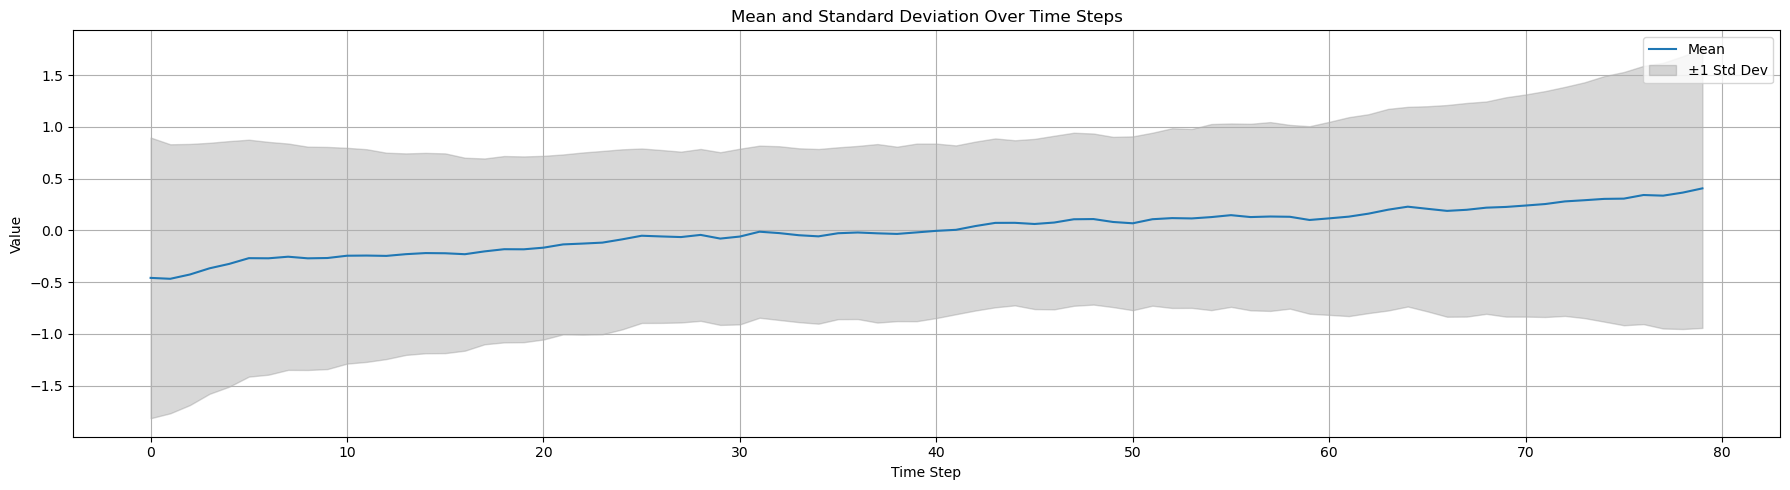

In [69]:
time_means = df.mean(axis=0)
time_stds = df.std(axis=0)
time_mins = df.min(axis=0)
time_maxs = df.max(axis=0)


plt.figure(figsize=(18, 5))
plt.plot(time_means, label='Mean')
plt.fill_between(range(len(time_means)),
                 time_means - time_stds,
                 time_means + time_stds,
                 color='gray', alpha=0.3, label='±1 Std Dev')
plt.title("Mean and Standard Deviation Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We see that the means oscillate between 0.5 and -0.5, which makes sense in our case since we are dealing with financial time series data. In fact, financial data usually fluctuates around a baseline and tends to have a mean close to 0 over short windows.

## Visualize Time Series Structure
Let's have a look at how these time series look like. To do so we take three sample time series and we plot them.

In [70]:
colors = ['pink', 'lightblue', 'lightgreen']  
sample_indices = [1000,2000,3000]  

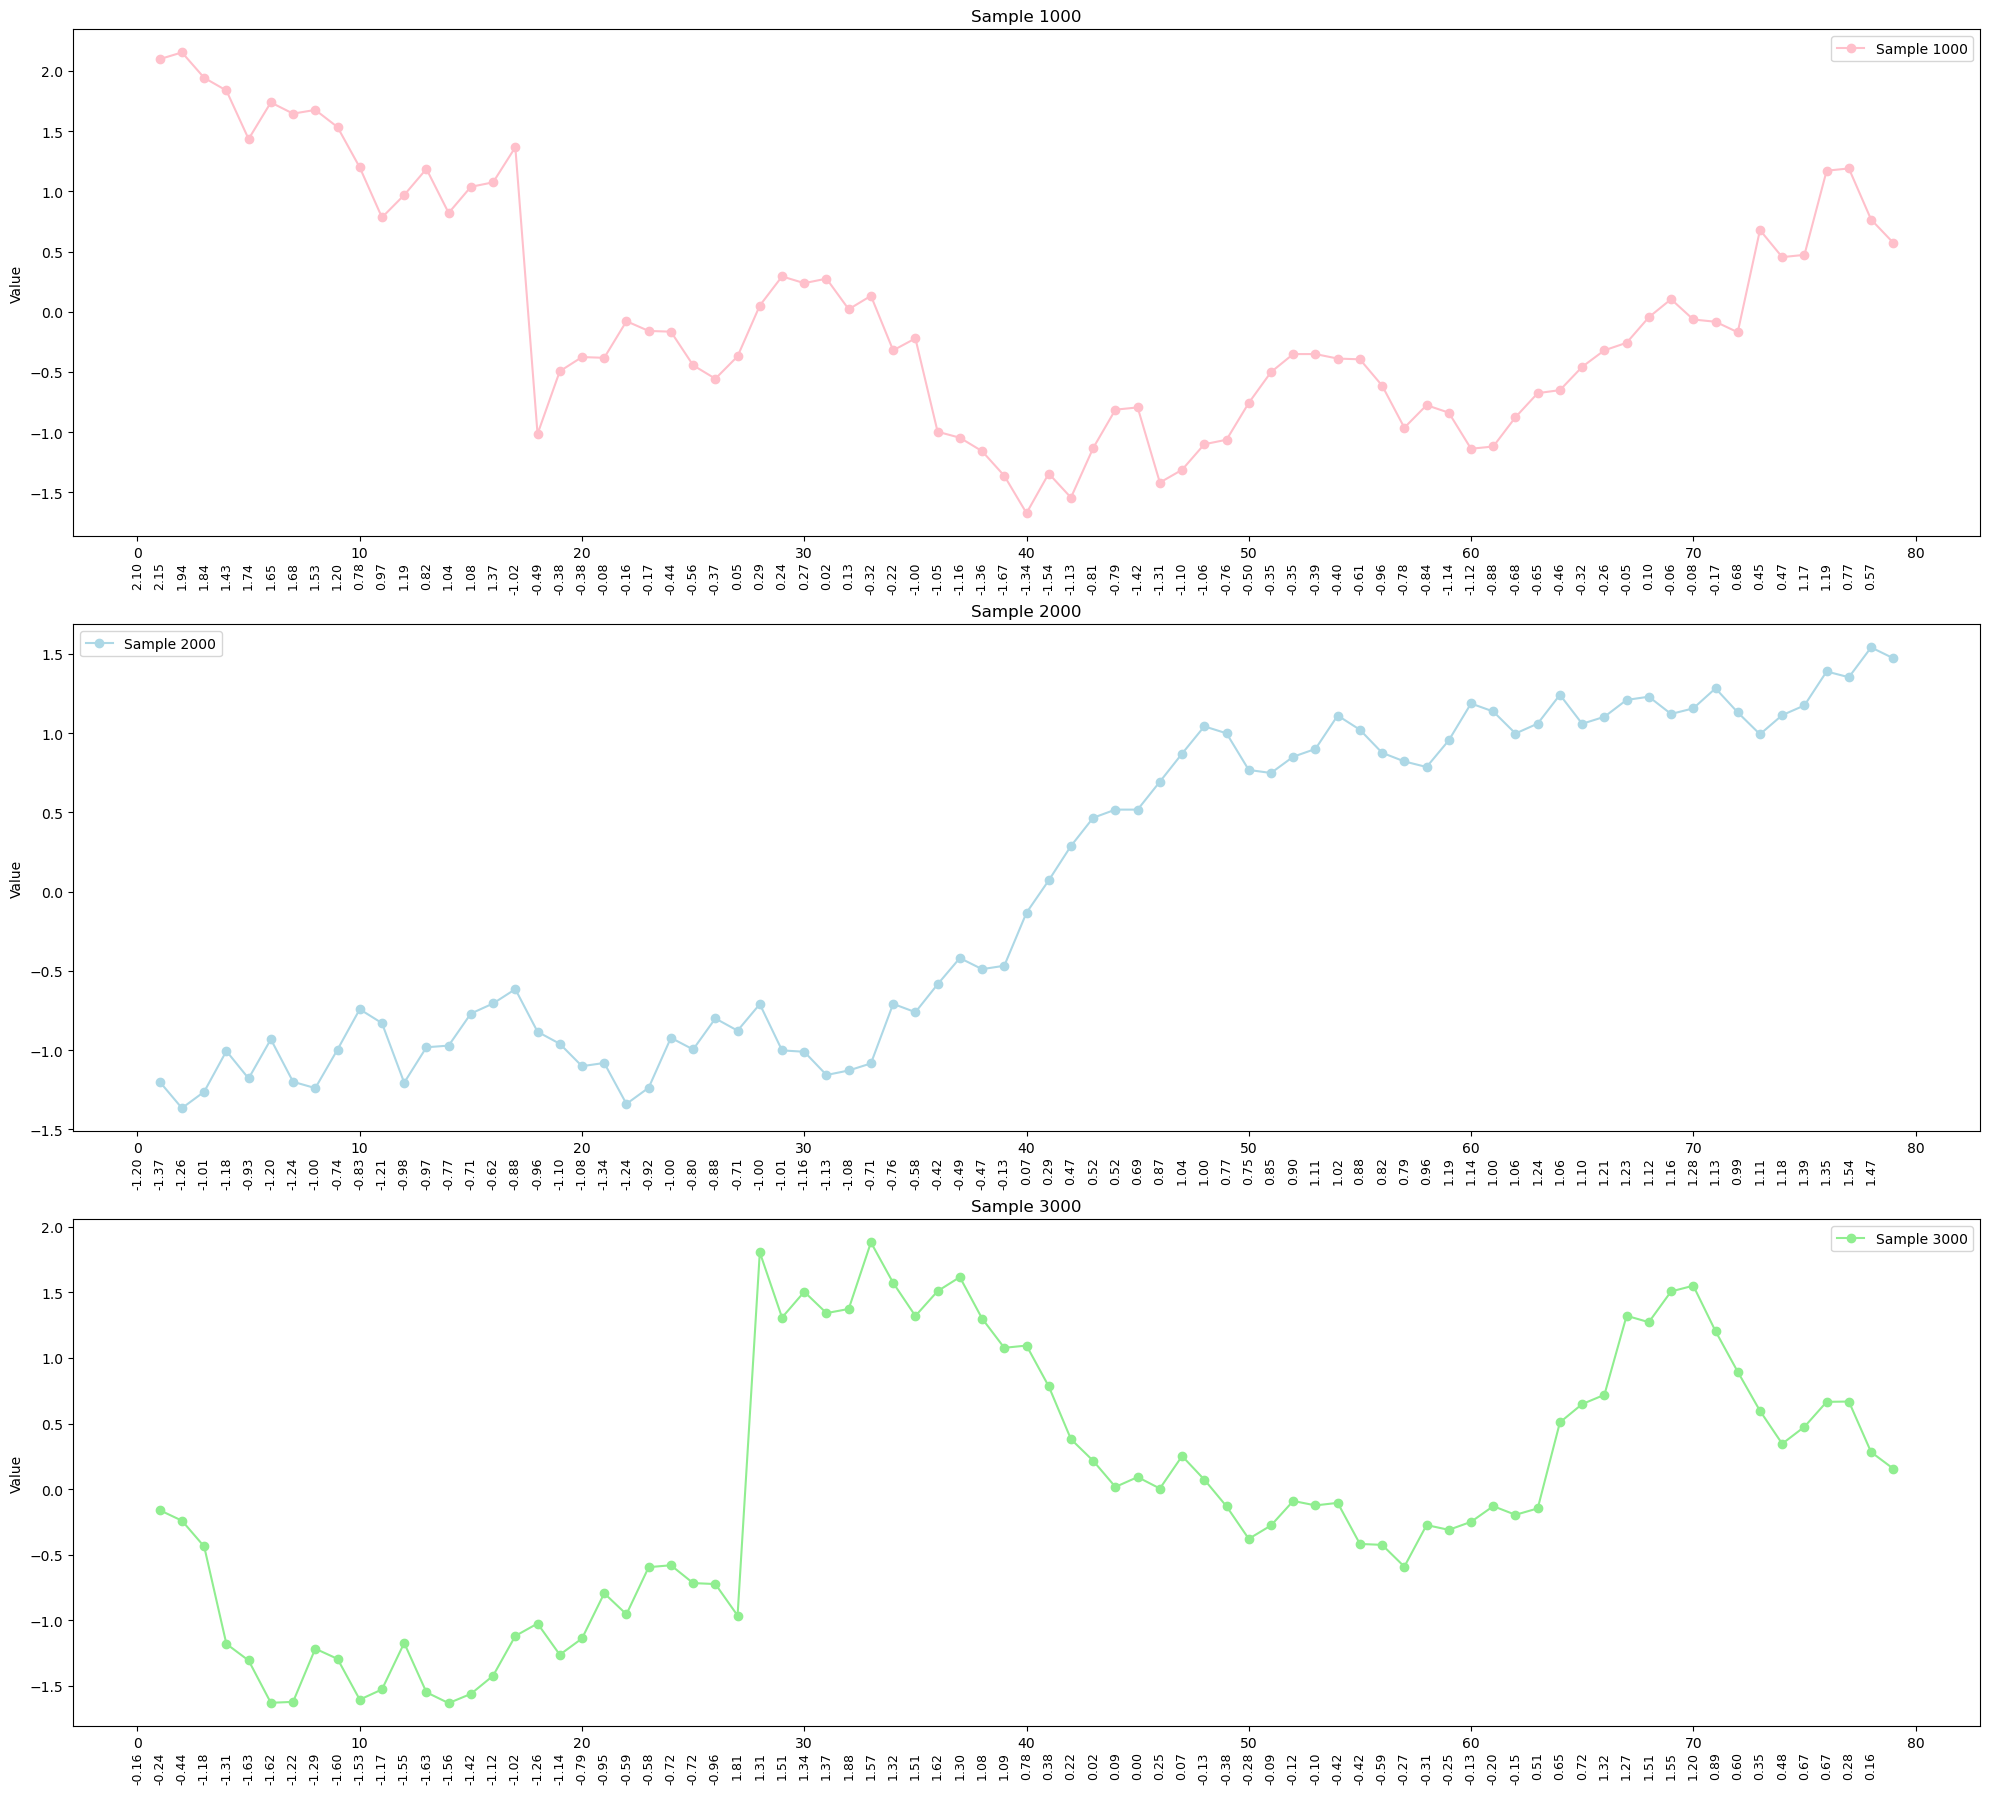

In [71]:
fig, axes = plt.subplots(len(sample_indices), 1, figsize=(20, 6 * len(sample_indices)))

for i, idx in enumerate(sample_indices):
    axes[i].plot(df.columns[1:], df.iloc[idx, 1:], label=f'Sample {idx}', color=colors[i], marker='o')
    axes[i].set_title(f'Sample {idx}')
    axes[i].set_ylabel('Value')
    axes[i].legend()

    x_positions = range(len(df.columns[1:]))
    numerical_values = df.iloc[idx, 1:].values
    for x, value in zip(x_positions, numerical_values):
        axes[i].text(x, axes[i].get_ylim()[0] - 0.05 * (axes[i].get_ylim()[1] - axes[i].get_ylim()[0]),
                     f'{value:.2f}', ha='center', va='top', fontsize=9, rotation=90)


plt.tight_layout()
plt.show()

## Distribution and Normality

We now look at the distribution of the columns and we see if this is normal.

We first start by plotting the ditribution of three sample columns through histograms and QQ-plots.

In [72]:
columns= [25,50,75]
sample_columns = [df.columns[i] for i in columns]


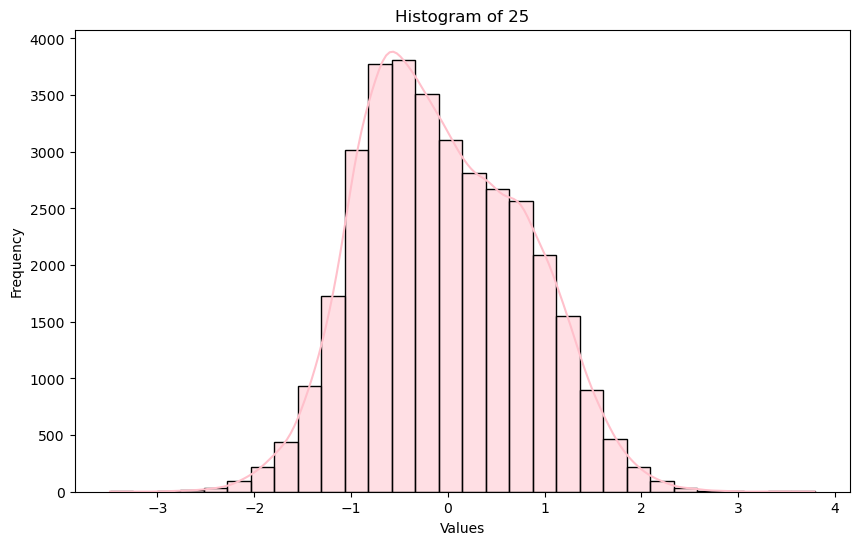

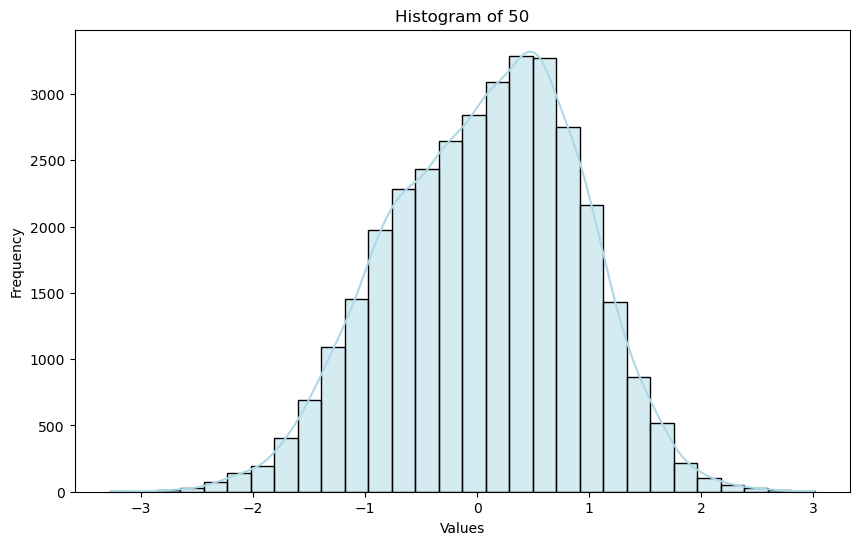

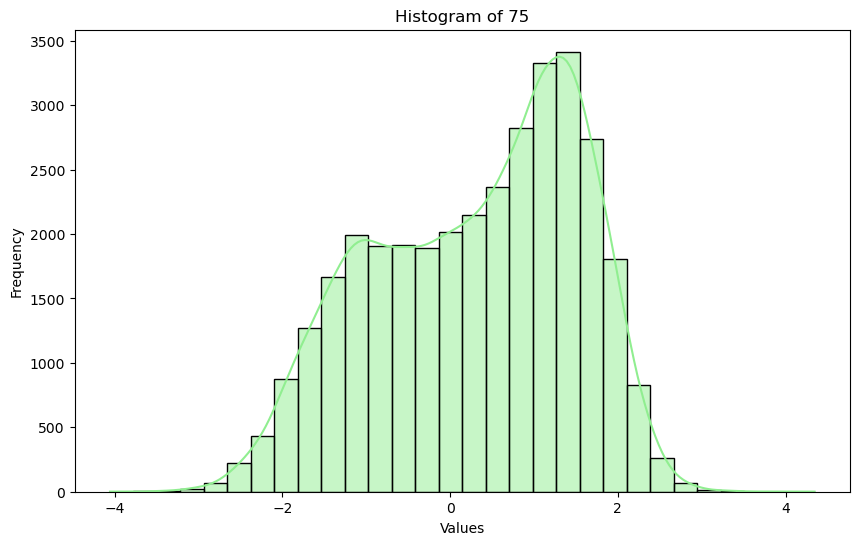

In [73]:
for i,idx in enumerate(sample_columns):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[idx], kde=True, color=colors[i], bins=30)
    plt.title(f"Histogram of {idx}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()


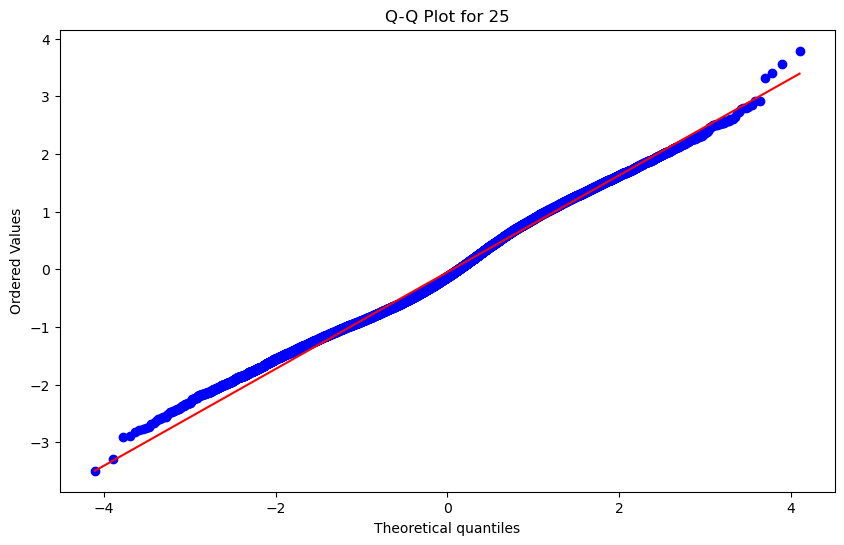

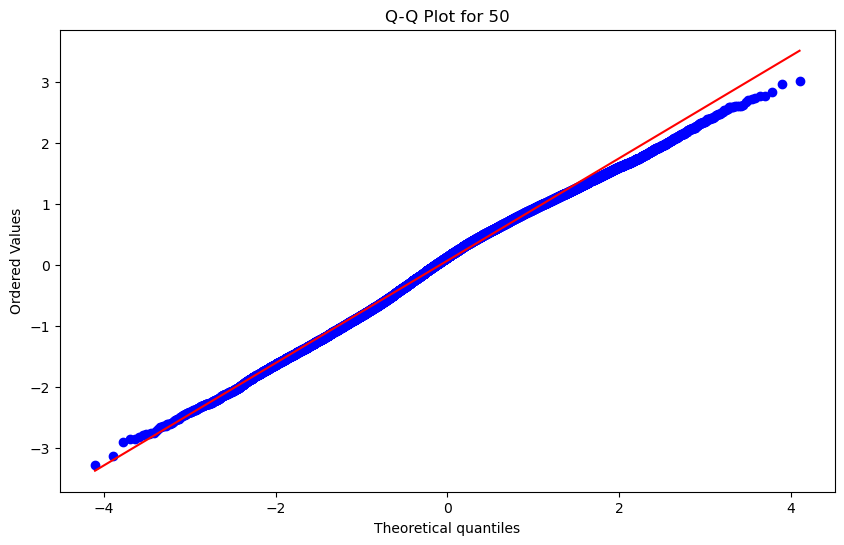

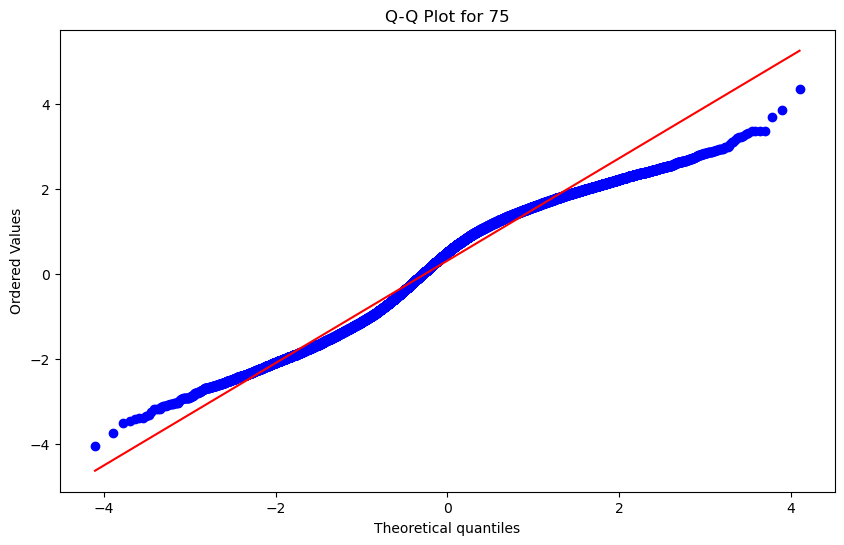

In [74]:
for idx in sample_columns:
    plt.figure(figsize=(10, 6))
    stats.probplot(df[idx], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {idx}")
    plt.show()

Already from here we can see that the three samples are not normally distributed. We can check analytically this using Kolmogorov-Smirnov test.

In [75]:
normal_count = 0
for idx in df.columns:
    mean, std = df[idx].mean(), df[idx].std()
    stat, p_value = kstest(df[idx], 'norm', args=(mean, std))
    if p_value > 0.05:
        normal_count += 1

print(f"Number of normally distributed columns: {normal_count}/{len(df.columns)}")

Number of normally distributed columns: 2/80


Only two of the columns are normally distributed, which is consistent with the nature of our dataset.

## Autocorrelation

We now take a look at the autocorrelation for three sample time series from our dataset.

Autocorrelation measures how a time series is related to its past values. If there's a strong autocorrelation at certain lags, it means that past values influence future ones — which can be useful for forecasting or understanding patterns in the data.

In the plots below, we use the autocorrelation function to check this. For each time series, we look at up to 20 lags to see how strongly each point is correlated with its previous values.

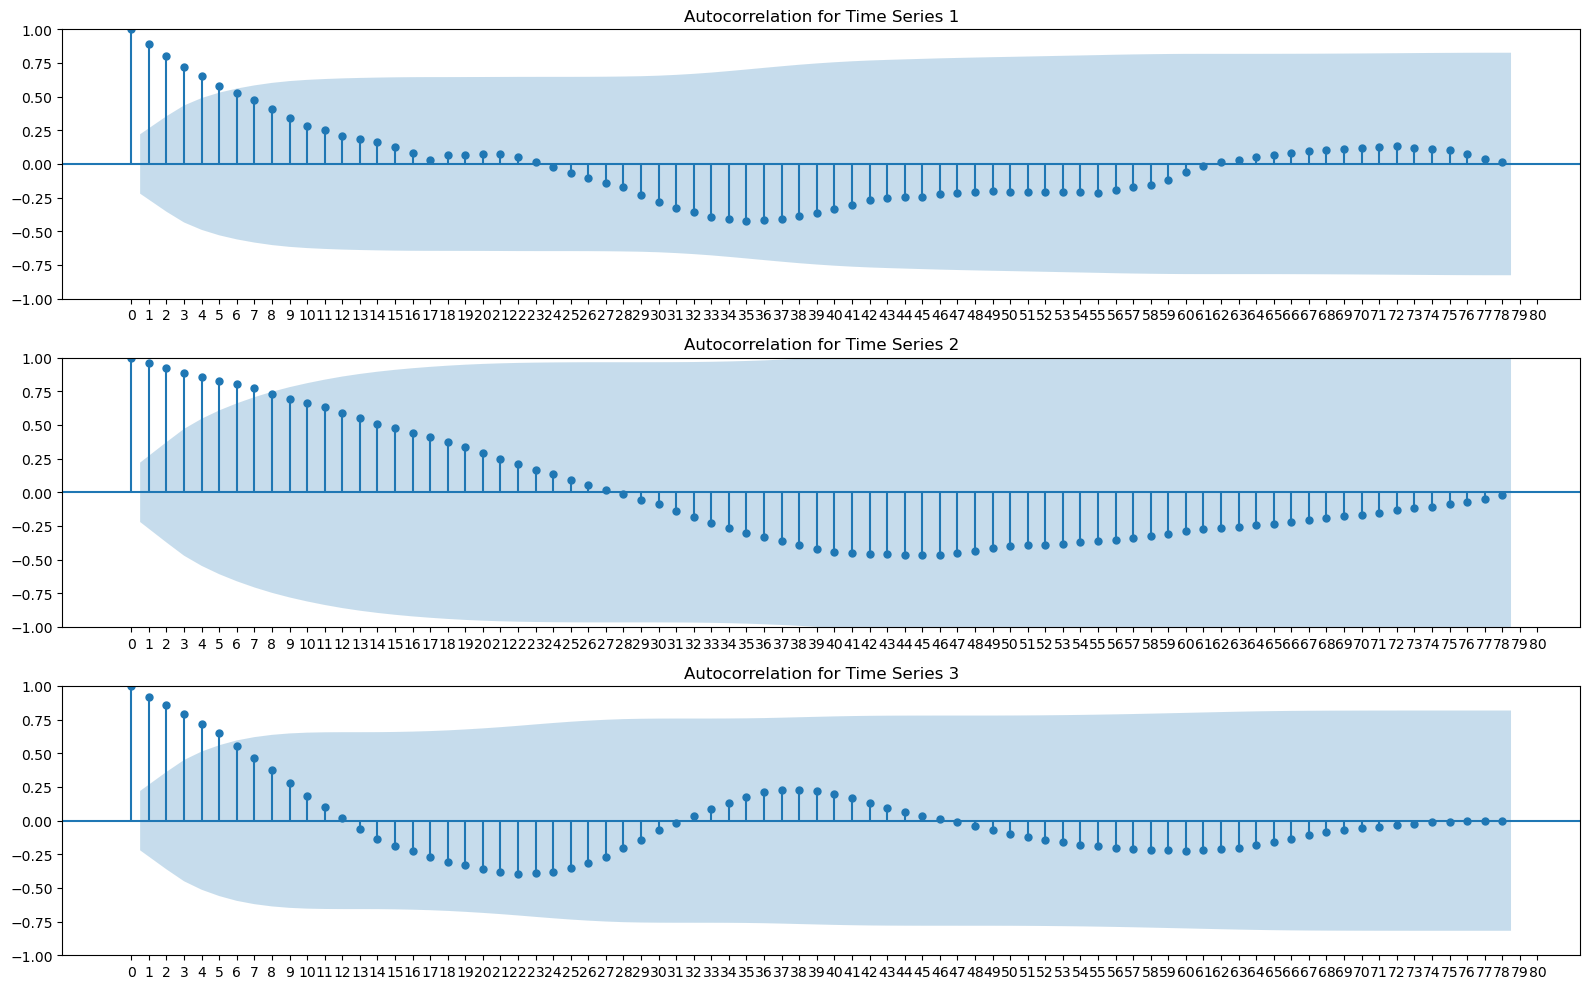

In [89]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))
selected_series = df.iloc[sample_indices, 1:]

for i, series in enumerate(selected_series.values):
    ax = axes[i]
    axes[i].set_xticks(range(0, 81, 1))
    axes[i].set_xticklabels(range(0, 81, 1))

    plot_acf(series, ax=ax, lags=78)  
    ax.set_title(f'Autocorrelation for Time Series {i + 1}')

plt.tight_layout()
plt.show()


In each plot:

- The **bars** represent the correlation of the time series with its past values (lags).
- The **shaded area** is the confidence interval. If a bar rises above or drops below this shaded region, it means that the correlation at that lag is statistically significant

So, if you see bars outside the shaded area, the time series has a meaningful relationship with its past at those lags. If all bars stay within the shaded area, the time series is likely more random or has very weak autocorrelation.

For our case, we see that the significant correlations are the ones up to the 5th–7th lag. This makes sense for our data, since financial time series typically do not exhibit strong or consistent long-term patterns. In fact markets are influenced by a wide range of unpredictable factors. As a result, any autocorrelations tend to decay quickly, capturing only short-term dependencies such as momentum or short-lived trends.

Already from the autocorrelation plot, we can deduce that this data will be harder to predict compared to, for example, the ECG data. The lack of strong or persistent correlations suggests that the time series is less structured and more influenced by randomness, which is typical in financial data and makes modeling more challenging.